In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading dataset

In [3]:
data =pd.read_csv('../data/MercadoLibre Data Scientist Technical Challenge - Dataset.csv')
print(data.shape)
data.head()


(150000, 19)


,a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.6812,50084.12,50.0,0.000000,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,NaN,Y,2020-03-20 09:28:19,57.63,100,0
1,4,0.6694,66005.49,0.0,0.000000,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,Y,Y,2020-03-09 13:58:28,40.19,25,0
2,4,0.4718,7059.05,4.0,0.463488,92.0,BR,25,cat_4c2544e,0.651835,2153.0,249.0,1,Y,Y,2020-04-08 12:25:55,5.77,23,0
3,4,0.7260,10043.10,24.0,0.046845,43.0,BR,43,cat_1b59ee3,0.692728,4845.0,141.0,1,N,Y,2020-03-14 11:46:13,40.89,23,0
4,4,0.7758,16584.42,2.0,0.154616,54.0,BR,0,cat_9bacaa5,0.201354,2856.0,18.0,1,Y,N,2020-03-23 14:17:13,18.98,71,0


## Target umbalancing

<Axes: xlabel='fraude'>

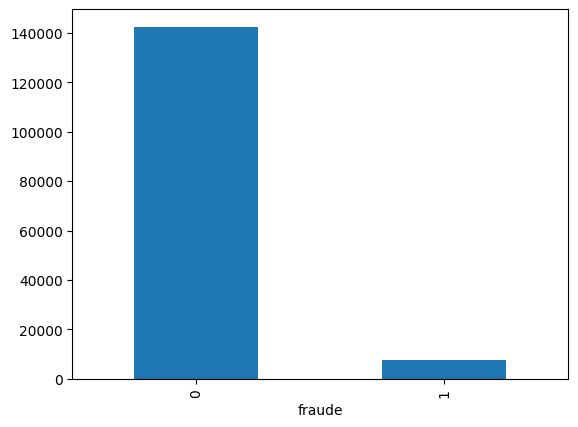

In [4]:
data['fraude'].value_counts().plot(kind='bar')

## NA values

In [5]:
## Vars with na
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean()

b    0.086560
c    0.086560
d    0.002433
f    0.000073
g    0.001293
l    0.000073
m    0.002433
o    0.725713
dtype: float64

In [6]:
data[vars_with_na]

,b,c,d,f,g,l,m,o
0,0.6812,50084.12,50.0,20.0,AR,2479.0,952.0,NaN
1,0.6694,66005.49,0.0,2.0,AR,2603.0,105.0,Y
2,0.4718,7059.05,4.0,92.0,BR,2153.0,249.0,Y
3,0.7260,10043.10,24.0,43.0,BR,4845.0,141.0,N
4,0.7758,16584.42,2.0,54.0,BR,2856.0,18.0,Y
...,...,...,...,...,...,...,...,...
149995,0.7728,34031.44,3.0,18.0,BR,2475.0,39.0,N
149996,0.7569,81957.82,50.0,5.0,BR,1073.0,672.0,NaN
149997,0.7012,77840.16,34.0,3.0,BR,2497.0,219.0,NaN
149998,0.7206,31001.65,50.0,50.0,UY,3952.0,84.0,NaN


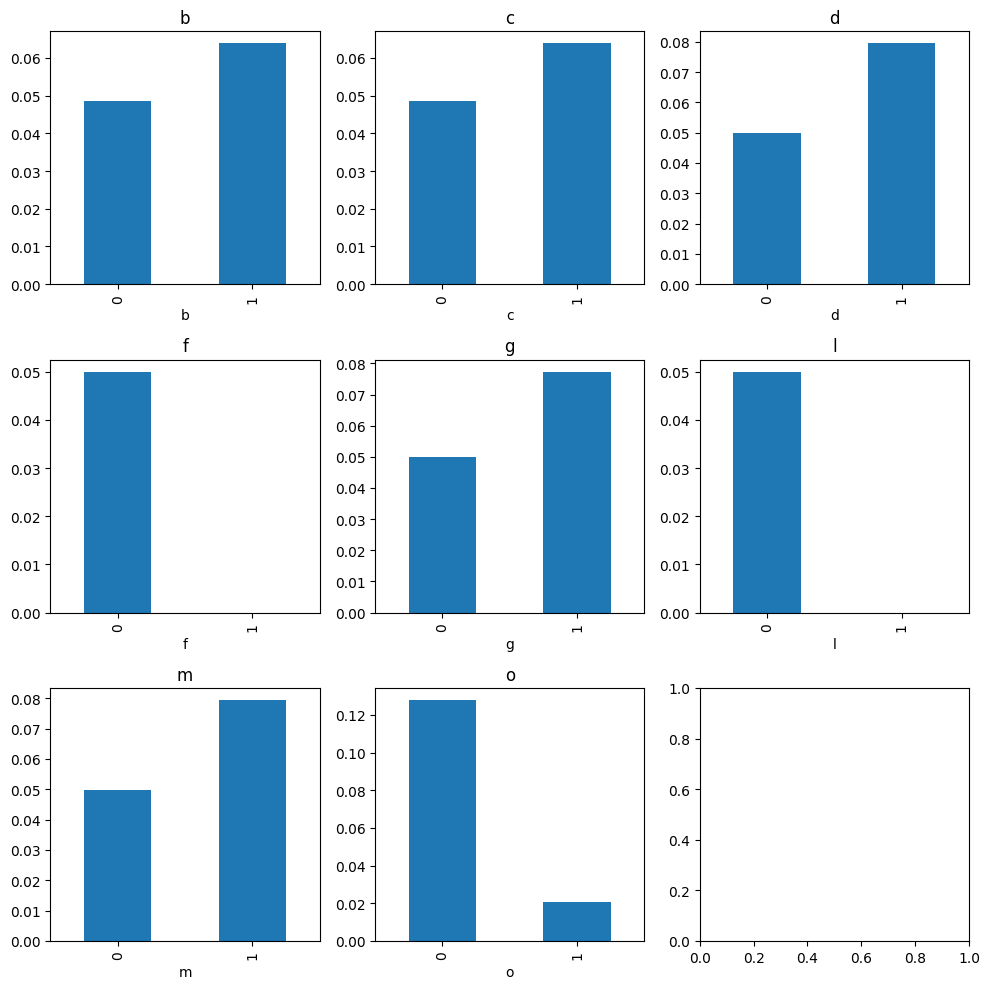

In [7]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    return df.groupby(var)['fraude'].mean()

# Determine the number of rows and columns for the subplot grid
n = len(vars_with_na)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10))

# Run the function on each variable with missing data and plot in the subplots
for var, ax in zip(vars_with_na, axs.flat):
    df =analyse_na_value(data, var)
    df.plot.bar(ax=ax)
    ax.set_title(var)

# Adjust the layout to prevent overlapping subplots
plt.tight_layout()
plt.show()

La presencia de NA tiene relacion con el fraude, es interesante agregar un missing indicator

In [8]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and 'fraude' not in var]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  13


,a,b,c,d,e,f,h,k,l,m,n,monto,score
0,4,0.6812,50084.12,50.0,0.000000,20.0,1,0.365475,2479.0,952.0,1,57.63,100
1,4,0.6694,66005.49,0.0,0.000000,2.0,1,0.612728,2603.0,105.0,1,40.19,25
2,4,0.4718,7059.05,4.0,0.463488,92.0,25,0.651835,2153.0,249.0,1,5.77,23
3,4,0.7260,10043.10,24.0,0.046845,43.0,43,0.692728,4845.0,141.0,1,40.89,23
4,4,0.7758,16584.42,2.0,0.154616,54.0,0,0.201354,2856.0,18.0,1,18.98,71


In [9]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [10]:
discrete_vars

['a', 'n']

In [11]:
def analyse_discrete_vars(var):
    data.groupby(var)['fraude'].mean().plot(kind='bar')
    plt.show()

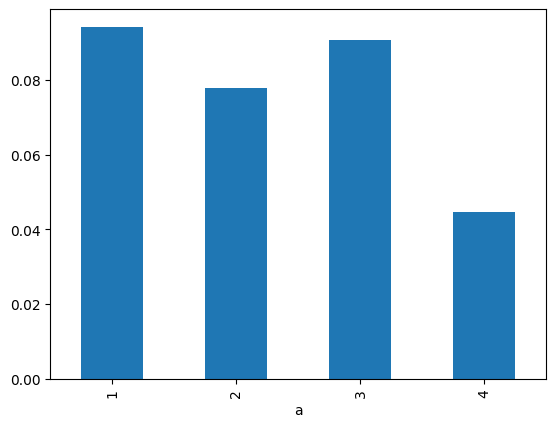

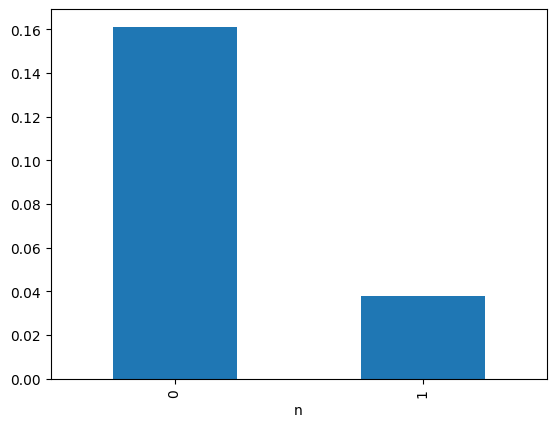

In [12]:
for var in discrete_vars:
    analyse_discrete_vars(var)

In [13]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  11


In [14]:
cont_vars

['b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'monto', 'score']

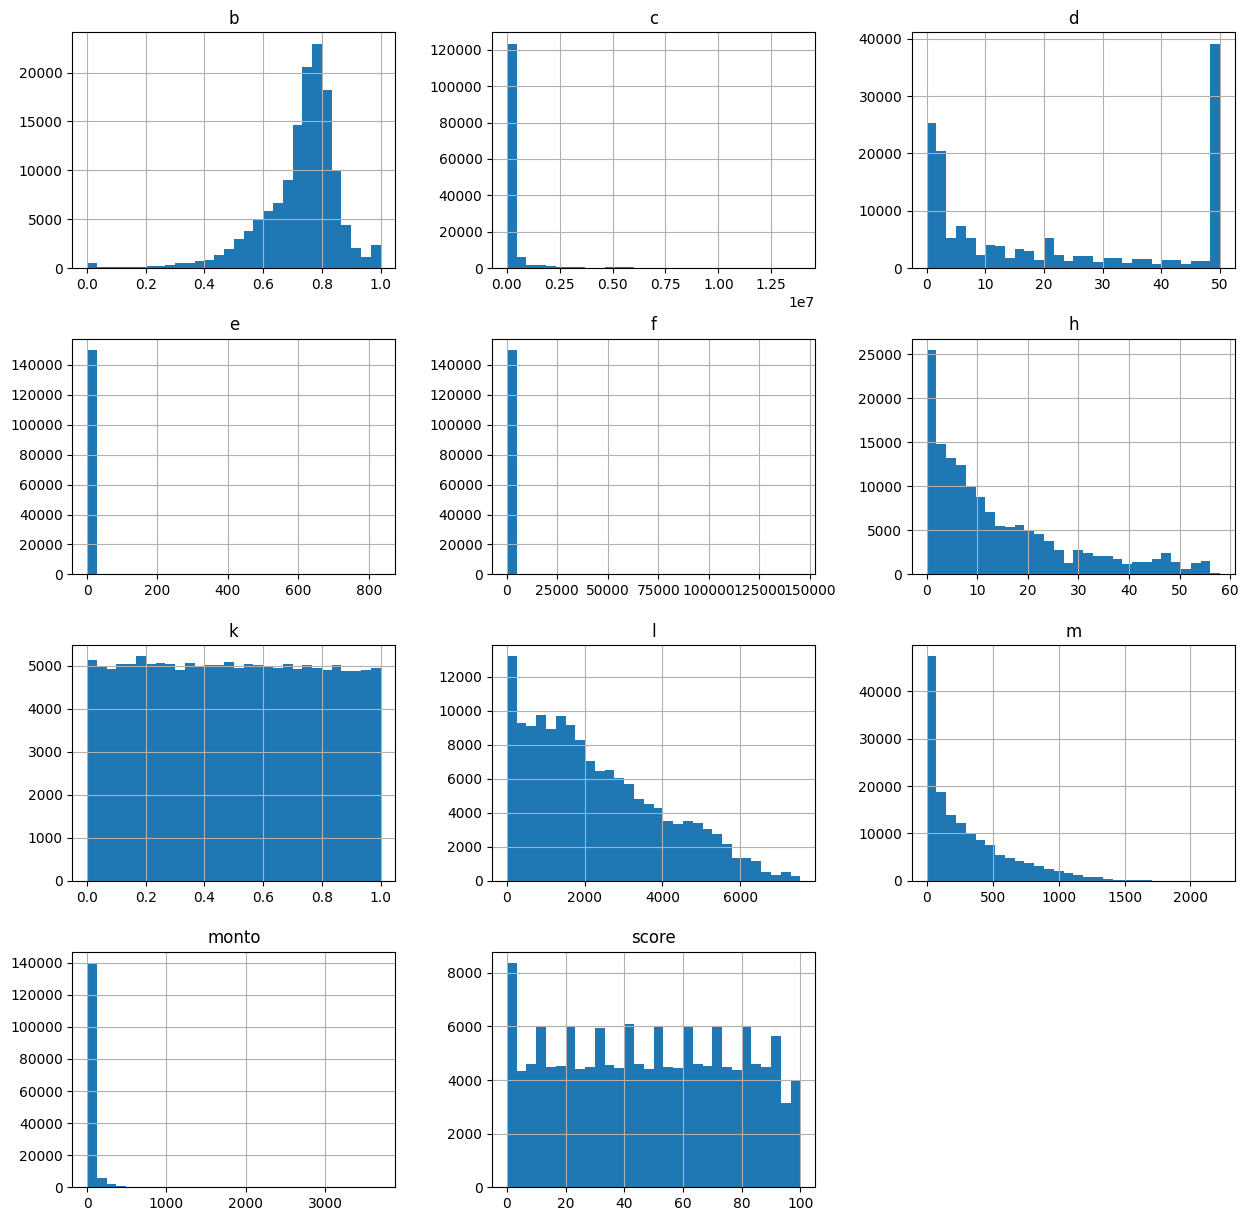

In [15]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
from scipy import stats
tmp = data.copy() 
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [16]:
## super skewed vars
skewed = ['e', 'f']


In [17]:
cont_vars = [var for var in cont_vars if var not in skewed]

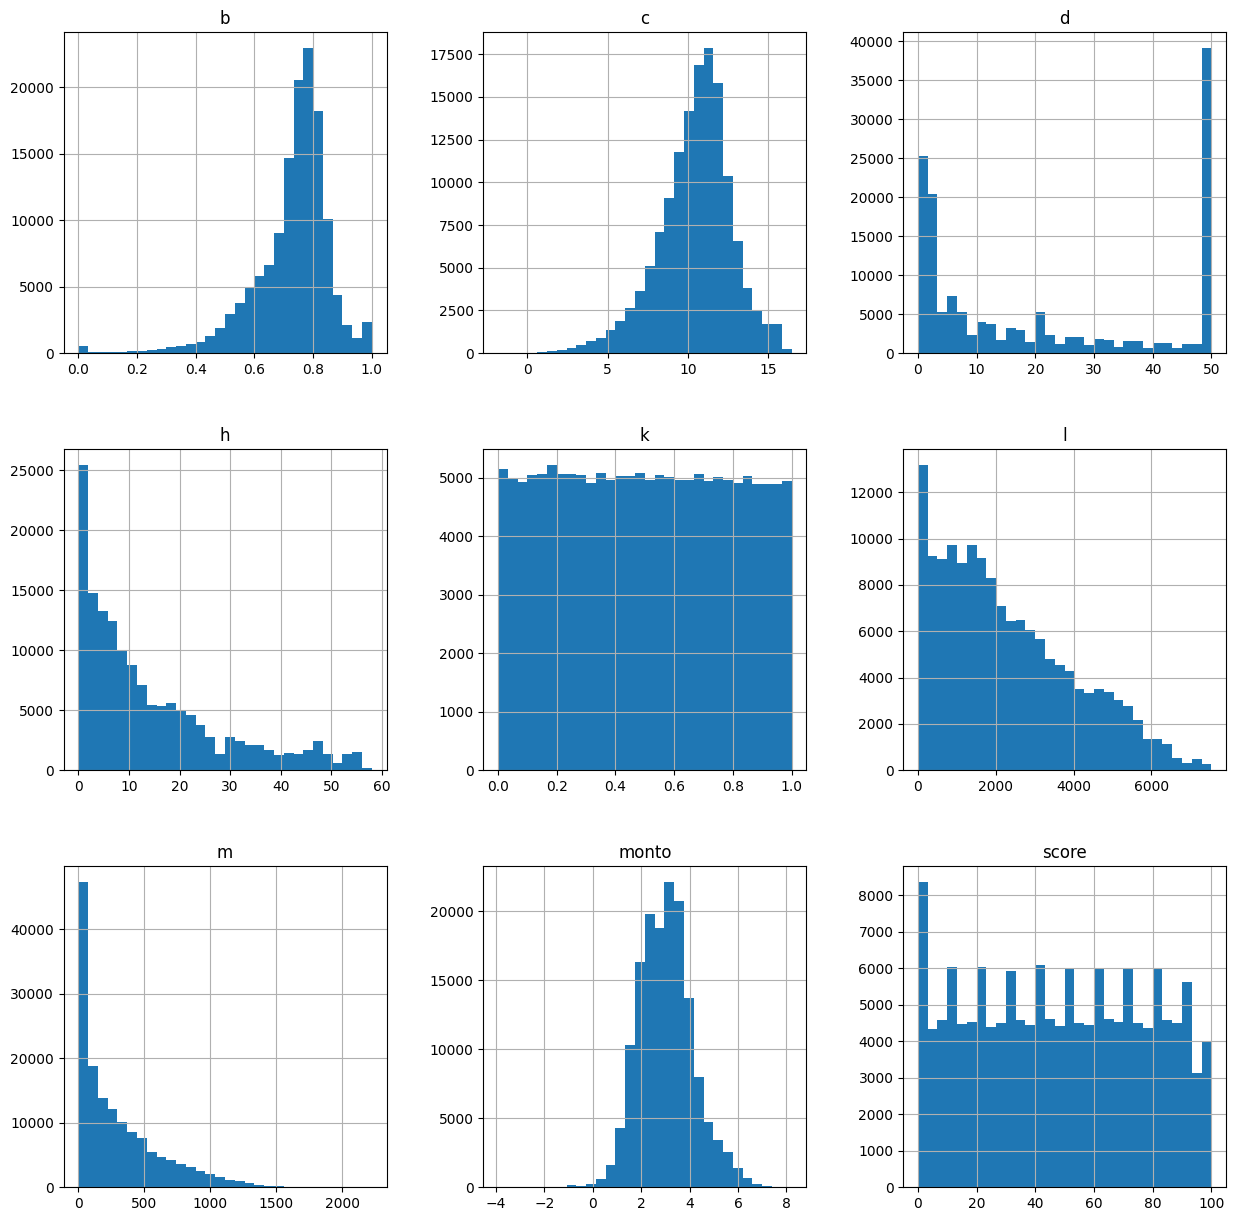

In [18]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

for var in ['c', 'monto']:

    # transform the variable - yeo-johsnon
    tmp[var] = np.log(tmp[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

### Aplico logaritmo a C y a monto, las demas las dejo originales, y e y f las discretizo

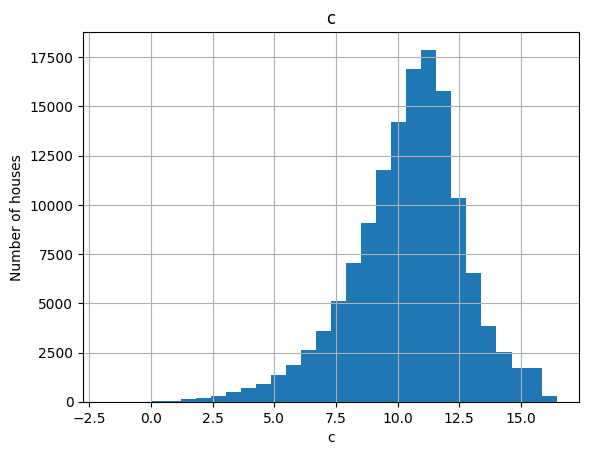

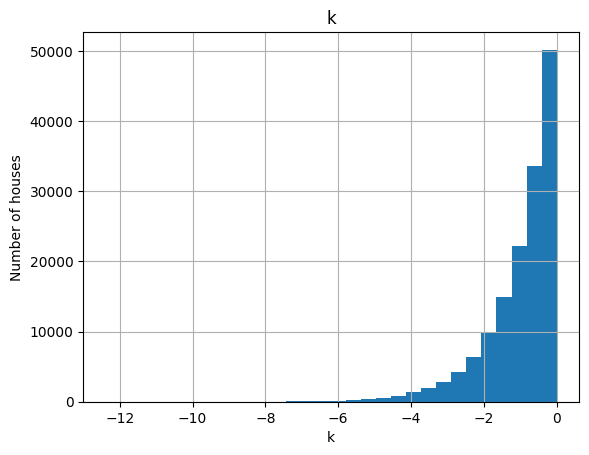

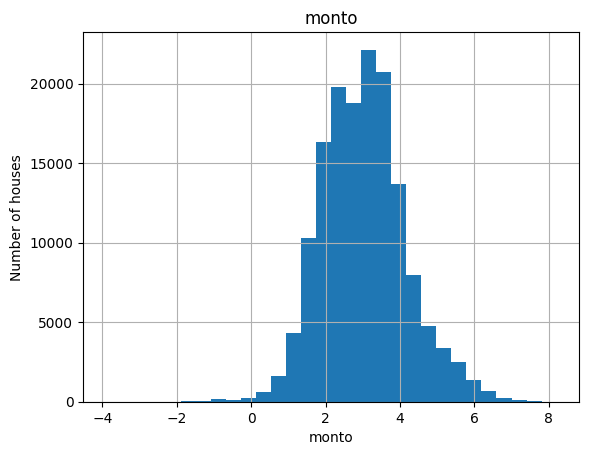

In [19]:
def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

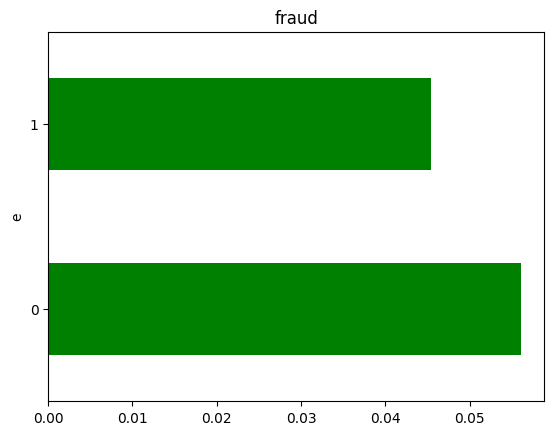

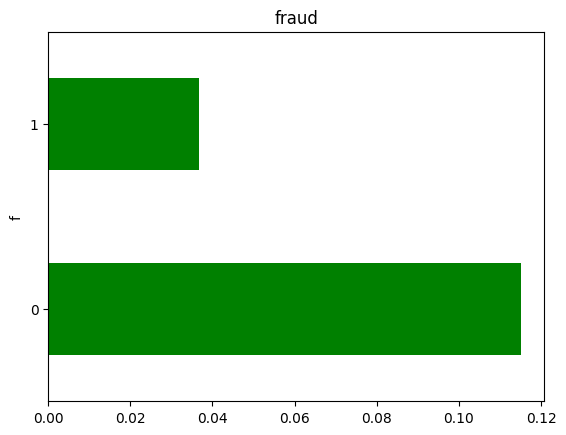

In [20]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['fraude'].agg(['mean'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False, title="fraud", color='green')

    plt.show()

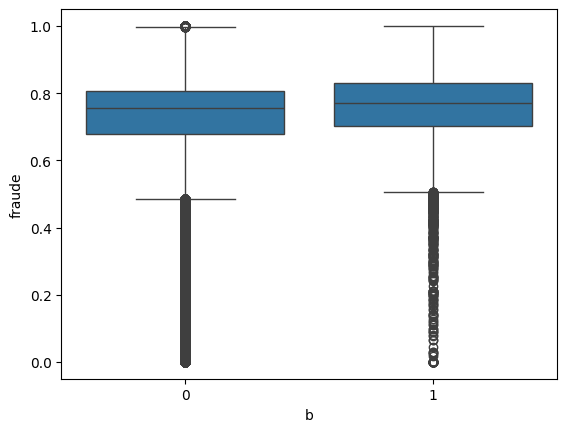

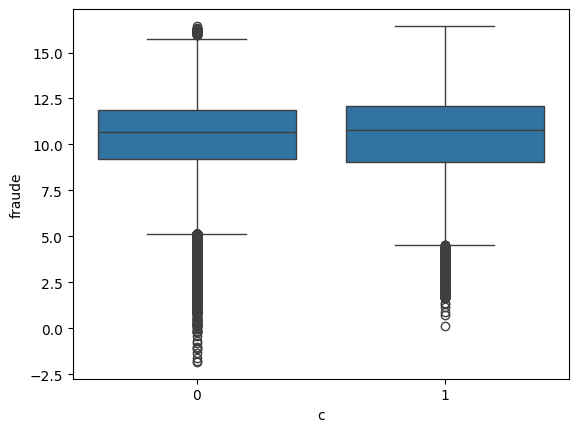

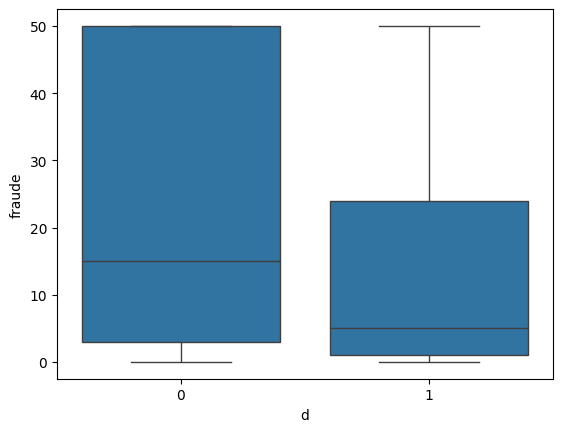

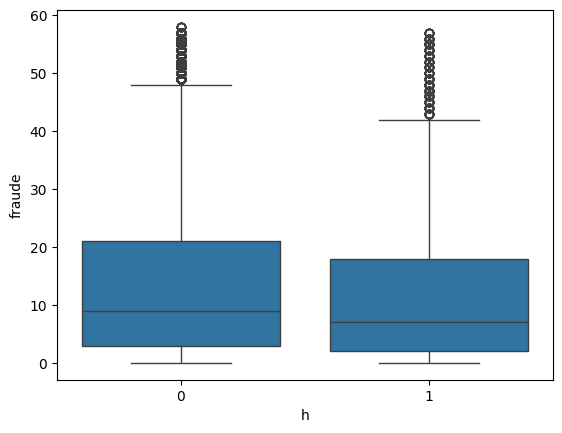

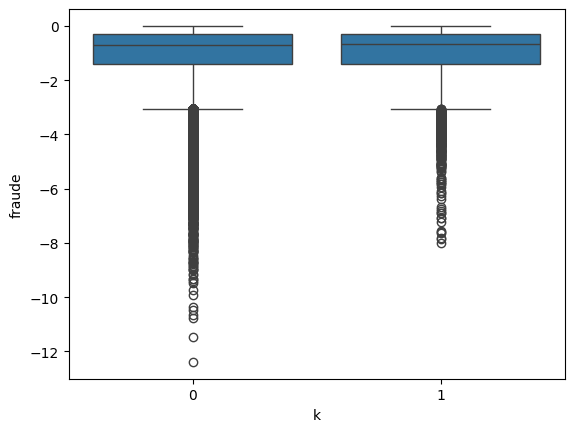

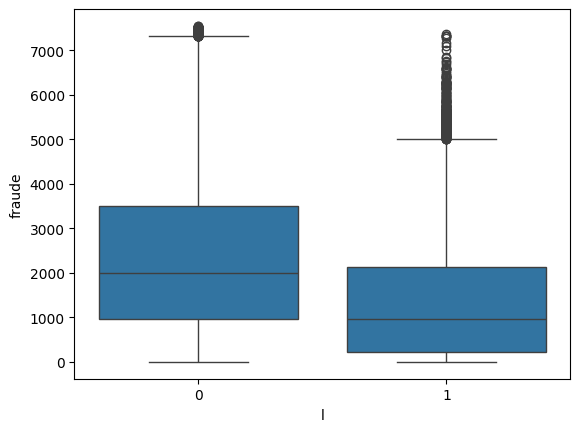

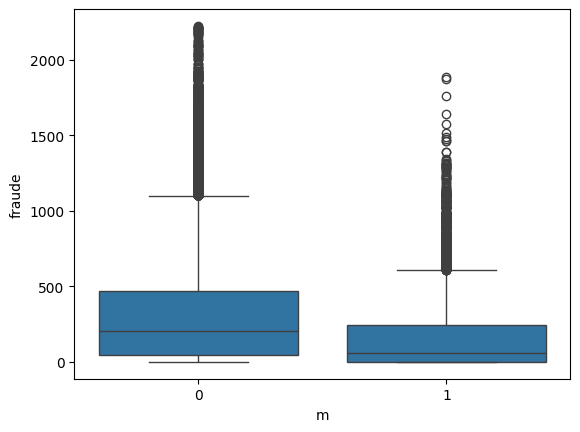

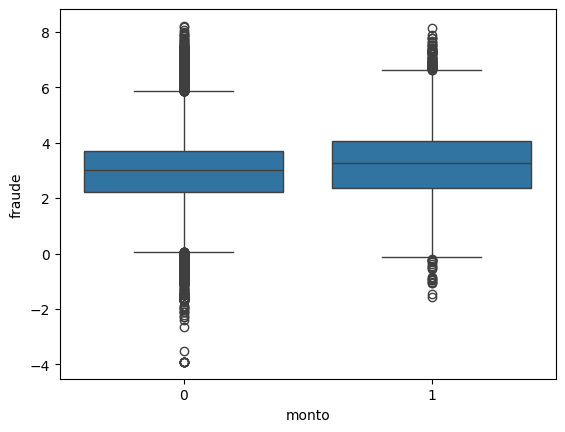

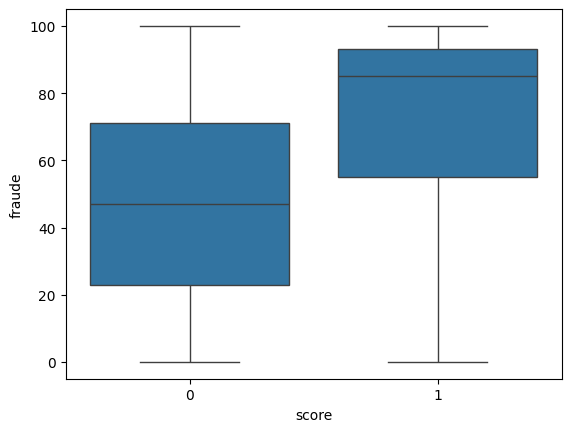

In [22]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:
import seaborn as sns

def analyse_continuous_fraud(df, var):
    df = df.copy()
        # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
    # plot
    sns.boxplot(data=df,x=df['fraude'], y=df[var])
    plt.ylabel('fraude')
    plt.xlabel(var)
    plt.show()


for var in cont_vars:
    analyse_continuous_fraud(data, var)

monto y c deben tener transformacion logaritmica

In [23]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and 'fecha' not in var]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [24]:
cat_vars

['g', 'j', 'o', 'p']

In [25]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['fraude'].count() / len(df)


    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

g
AD    0.000007
AE    0.000013
AU    0.000020
BE    0.000020
BO    0.000013
BS    0.000007
CA    0.000020
CH    0.000020
CL    0.000060
CN    0.000020
CO    0.000427
CR    0.000013
DE    0.000060
DO    0.000007
EC    0.000027
EG    0.000007
ES    0.000460
FI    0.000007
FR    0.000120
GB    0.000287
GE    0.000007
GH    0.000007
GR    0.000007
HN    0.000007
IL    0.000007
IN    0.000007
IT    0.000093
JP    0.000007
KR    0.000007
LB    0.000013
MX    0.001573
NI    0.000007
NL    0.000013
NO    0.000007
NZ    0.000020
PA    0.000020
PE    0.000033
PH    0.000007
PR    0.000013
PT    0.000087
PY    0.000027
RU    0.000487
SE    0.002387
TR    0.000007
TW    0.000007
UA    0.000020
ZA    0.000007
Name: fraude, dtype: float64

j
cat_0005972    0.000020
cat_00115ef    0.000153
cat_0013c63    0.000020
cat_001bdea    0.000020
cat_0023dc4    0.000067
                 ...   
cat_ffdf1e2    0.000027
cat_ffe1c2f    0.000013
cat_ffe6d8e    0.000007
cat_ffe7351    0.004560
cat_fff9534    0.0000

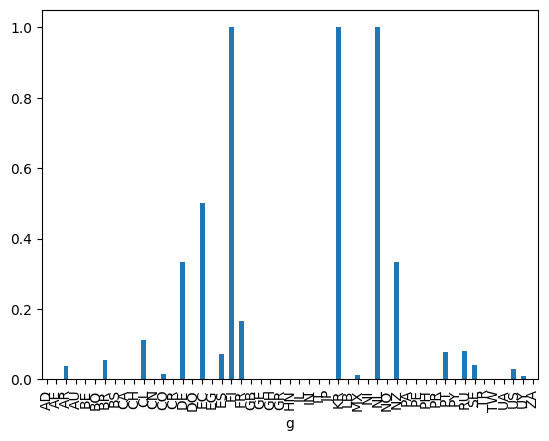

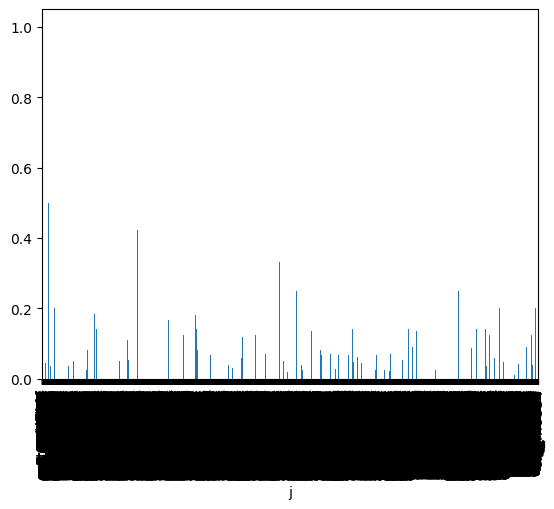

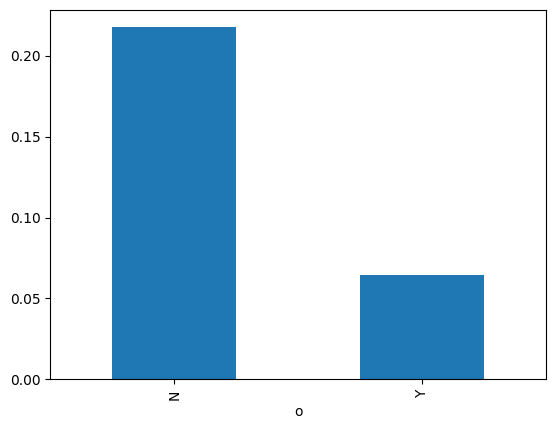

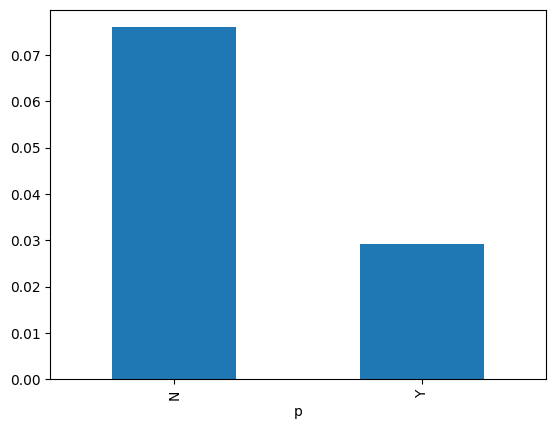

In [26]:
for var in cat_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyse_discrete_vars(var)